In [ ]:
%history

In [5]:
import pandas as pd
import numpy as np
import numpy.matlib
import math 
from numpy import linalg as LA
from matplotlib import pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_data = pd.read_csv('/content/drive/My Drive/IS/IS_HW4/Q1/Train_Data.csv', header = None).to_numpy()
test_data = pd.read_csv('/content/drive/My Drive/IS/IS_HW4/Q1/Test_Data.csv', header = None).to_numpy()
train_labels = pd.read_csv('/content/drive/My Drive/IS/IS_HW4/Q1/Train_Labels.csv', header = None).to_numpy()
test_labels = pd.read_csv('/content/drive/My Drive/IS/IS_HW4/Q1/Test_Labels.csv', header = None).to_numpy()

In [8]:
def normalize(x):
    y = (x - np.mean(x, axis = 0))/np.std(x, axis = 0)
    return y

In [9]:
train_data = normalize(train_data)
test_data = normalize(test_data)

In [122]:
class Kmeans:
    def __init__ ( self , n_itter , k ):
        self.n_itter = n_itter
        self.k = k
        self.n_dimensions = 1
        self.centroids = 0
        self.clusters = {}

    def initial_centroids( self , x ):
        index = []
        while len(index) != self.k :
            temp = np.random.randint(x.shape[0])
            if temp not in index :
                index.append( temp )
        self.centroids = np.zeros((self.k , x.shape[1]))
        for i in range(self.k):
            self.centroids[ i , : ] = x[ index[ i ] , : ]

    def distance_calculator( self , x , y ):
        return ( sum( ( x - y )**2 ) )**0.5

    def initial_clusters( self ):
        for i in range(self.k):
            self.clusters[ i ] = np.array([])

    def assign_data( self ,  x ):
        self.initial_clusters()
        for data_num in range( x.shape[0] ):
            temp  = []
            for i in range(self.k):
                temp.append(self.distance_calculator( self.centroids[ i , : ] , x[ data_num , : ] ))
            index = np.argmin(temp)
            if len( self.clusters[ index ] ) == 0 :
                self.clusters[ index ] = np.array(x[data_num , :], ndmin = 2)
            else:
                self.clusters[ index ] = np.concatenate((self.clusters[ index ] , np.array(x[data_num , :], ndmin = 2) ) , axis = 0 )

    def recentrize( self , x):
        for i in range(self.k):
            if self.clusters[ i ].shape[0] != 0 :
                self.centroids[ i , : ] = np.mean(self.clusters[ i ] , axis = 0 )
            else :
                self.centroids[ i , : ] = np.zeros((1,x.shape[1]))
    
    def run( self , x ):
        self.initial_centroids( x )
        i = 0 
        temp = 0
        while np.any( temp != self.centroids ):
            self.assign_data( x )
            temp = self.centroids
            self.recentrize( x )
            i = i + 1
            if i == self.n_itter :
                print("max itter reached! \n",self.k)
                break
        return self.centroids

    def cal_loss(self):
        loss = 0
        for i in range( self.k):
            if np.all( self.centroids[i , : ] != 0):
                loss = loss + np.sum(( self.clusters[i] - self.centroids[i , : ])**2)
        return loss

    def test( self , test , centroids ):
        clusters = {}
        k = centroids.shape[0]
        for i in range(k):
            clusters[ i ] = np.array([])
        for data_num in range( test.shape[0] ):
            temp  = []
            for i in range(k):
                temp.append(self.distance_calculator( centroids[ i , : ] , test[ data_num , : ] ))
            index = np.argmin(temp)
            clusters[ index ] = np.concatenate((self.clusters[ index ] , np.array(test[data_num , :], ndmin = 2) ) , axis = 0 )
        return clusters

In [123]:
kmeans = Kmeans(400, 15 )

centroids = kmeans.run(train_data)
loss = kmeans.cal_loss()

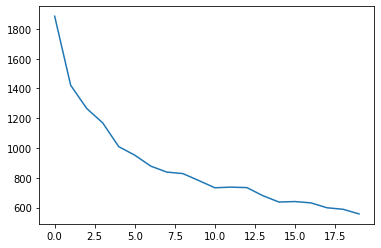

In [125]:
temp = []
for i in range(20):
    a = []
    for j in range(10):
        kmeans = Kmeans(400, i + 1 )
        centroids = kmeans.run(train_data)
        a.append(kmeans.cal_loss())
    temp.append(np.mean(a))
plt.plot(temp)